# Mostrando pixels del imagen en un grafico.
# Para que podemos ver como hacer un fill con los pixels.

In [1433]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

%matplotlib inline

# Importa los modulos necesarios edentro de sublimify 

In [1434]:
import sys
import os

# Set the Environment variable to the path of the project in sublimify
# So we can use the project's modules

module_path = os.getcwd() + "/../"
sys.path.insert(1, module_path)

from sublimify.utils.add_text import add_text
from sublimify.utils.decide_color import decide_color
from sublimify.subliminals.choose_font import choose_font

# Data de imagen

In [1435]:
# Ok entonces ahora queremos poner unos photos
image_path = "../images/dad"
path_ending = ".jpg"

image = Image.open(image_path + path_ending)

# Hacemos una copia
image.save(image_path + f'_copy{path_ending}')
image = Image.open(image_path + f'_copy{path_ending}')

# Converte a un numpy array
image_array = np.array(image)
coordinates = []

# Data de subliminal

In [1436]:
font_size = image.height / 20

# El font del texo
font = choose_font('Roboto-Bold', int(font_size))

In [1437]:
# Escribe el texto
text = "SEX"

# Get the size of the text on the image
text_size = font.getsize(text)
text_size

(185, 96)

In [1438]:
# Edita la imagen con texto
x_end = None
y_end = None

while 1:
    x = np.random.randint(0, image_array.shape[1])
    y = np.random.randint(0, image_array.shape[0])
    # Chequea que x y y no son afuera de la imagen
    # End of x and y
    x_end = x + text_size[0]
    y_end = y + text_size[1]

    if x_end > image_array.shape[1] or y_end > image_array.shape[0]:
        continue

    break
    

# Edita la imagen (Sublimify)

In [1439]:
add_text(image, text, position=(x, y), save=True, font=font, color='blue')
coordinates.append((x, y))

In [1440]:
# Un nuevo numpy array
changed_image = np.array(image)

In [1441]:
# Busca la differencia de los dos imagenes
difference = (image_array != changed_image).nonzero()
x_difference = difference[1]
y_difference = difference[0]

difference

(array([772, 772, 772, ..., 846, 846, 846], dtype=int64),
 array([153, 153, 153, ..., 171, 171, 171], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [1442]:
# Cambia el color de cada pixel
for i in range(len(x_difference)):
    loc_x = x_difference[i]
    loc_y = y_difference[i]

    skip = random.randint(0, 10)

    current_pixel = image_array[loc_y, loc_x]
    color_to_change_into = decide_color(current_pixel, 10)
    if skip % 2 == 0 or skip % 3 == 0:
        color_to_change_into = current_pixel

    changed_image[loc_y, loc_x] = color_to_change_into

In [1443]:
# Guarda la imagen
cimage = Image.fromarray(changed_image)
cimage.save(image_path + f'_changed{path_ending}')

# Plot data

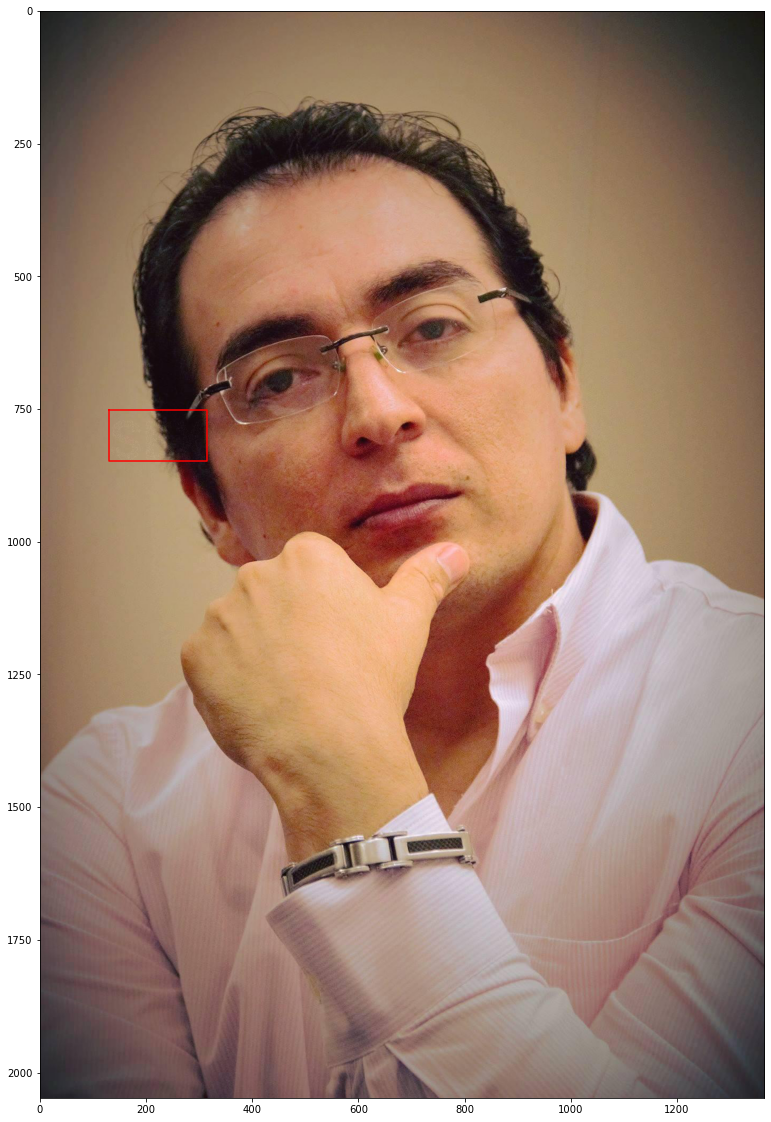

In [1444]:
# Dibuja caja
plt.figure(figsize=(20, 20))
plt.imshow(changed_image)
plt.plot([x, x_end, x_end, x, x], [y, y, y_end, y_end, y], color='red')

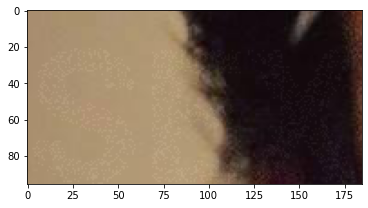

In [1445]:
# Crop el imagen donde hay la caja
cropped_image = changed_image[y:y_end, x:x_end]

text_box = Image.fromarray(cropped_image)
plt.imshow(text_box)

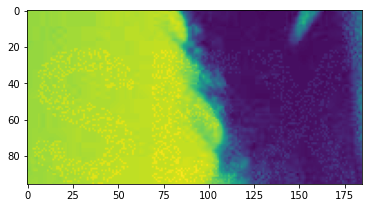

In [1446]:
# Converte image a Grey
text_box = text_box.convert('L')
plt.imshow(text_box)

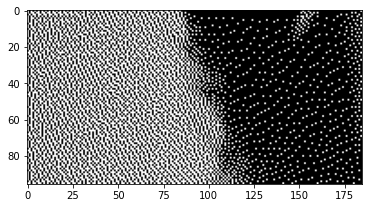

In [1447]:
text_box = text_box.convert('1')
plt.imshow(text_box)

In [1448]:
# # Converte imagen y usamos un threshold
# text_box = text_box.convert('1')
# plt.imshow(text_box)

# Lee el subliminal
Testing

In [1449]:
# Import el tesseract
import pytesseract.pytesseract as tess
from pytesseract.pytesseract import image_to_string

# El cmd
tess.tesseract_cmd = r'C:\Users\jorda\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [1450]:
# Intenta leer el texto
image_text = image_to_string(text_box, lang='eng', config='--psm 7 -c page_separator=')
image_text = image_text.replace('\n', '')
image_text = image_text.replace(' ', '')

possibilities = [
    'SEY',
    'SEX'
]

if image_text in possibilities:
    print("Encontrado")
else:
    print(f"No encontro, Lo que encontro fue: {image_text}")

No encontro, Lo que encontro fue: 
